### Conculsion
- Multiple tests with K 3, 5, 7, and 9
- The performance didn't change after 7, as the accuracy was 78%, 81%, 83%, and 83%. Therefore, k=7 was selected.
- The performance didn't change without the utterances classes features
- Forest plot for odds ratio

This script was based on the article below:
https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26

I should add a reference for this

"It calculates the correlation/strength-of-association of features in the data-set with both categorical and continuous features using: Pearson’s R for continuous-continuous cases, Correlation Ratio for categorical-continuous cases, Cramer’s V or Theil’s U for categorical-categorical cases."

## Do general imports

In [1]:
from classifiers.testing import cycle_test,TestType,TestInputs,DatasetFeatures
from pandas.api.types import CategoricalDtype
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

score_category = CategoricalDtype(categories=[0, 1, 2], ordered=True)

In [2]:
import math as m
m.exp(-0.6395)

0.5275561361776098

In [3]:
# Define function to output plot of the model coefficients
# https://gist.github.com/JessicaFB/30e9fbe390fb2207e9f86b25d1e686c2
def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)
    coef_df['coef'] = [m.exp(v) for v in coef_df['coef'].values]
    coef_df['[0.025'] = [m.exp(v) for v in coef_df['[0.025'].values]

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['0/1','1/2'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    # print(coef_df)
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot()
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='barh',
                 ax=ax, color='none', 
                 ecolor='steelblue',capsize=0,
                 xerr='errors', legend=False)
    
    # Set title & labels
    # plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('',fontsize=22)
    ax.set_xlabel('Odds Ratio',fontsize=22)
    
    # Coefficients
    ax.scatter(y=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               x=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axvline(x=1, linestyle='--', color='red', linewidth=1)
    
    return plt.show()

### Options

In [4]:
# option 1: all aggregated features
# option 2: Aggregated WF time and detailed features for utterances
# option 3: Aggregated utterances and detailed WF time
# option 4: Detailed WF time and Detailed utterances features


assignee_utterances = [
    'utr_assignee_open_close',
           'utr_assignee_inform', 'utr_assignee_user_mention',
           'utr_assignee_resolution', 'utr_assignee_technical',
           'utr_assignee_investigation', 'utr_assignee_assignment_update',
           'utr_assignee_reminder', 'utr_assignee_status_update',
           'utr_assignee_support_session']

reporter_utterances =[
            'utr_reporter_user_mention',
           'utr_reporter_open_close', 'utr_reporter_support_session',
           'utr_reporter_request', 'utr_reporter_attach_info',
           'utr_reporter_resolution', 'utr_reporter_inform',
           'utr_reporter_technical']

others_utterances=[
    'utr_others_open_close',
           'utr_others_user_mention', 'utr_others_investigation',
           'utr_others_reminder', 'utr_others_assignment_update',
           'utr_others_technical', 'utr_others_request',
           'utr_others_resolution_update', 'utr_others_update_request',
           'utr_others_resolution']

wf_features =[
        'wf_resolved',
        'wf_open', 
        'wf_in_progress',
        'wf_reopened',
        'wf_validation',
        'wf_resolved_under_monitoring',
        'wf_closed',  
        'wf_waiting', 
        'wf_pending_deployment']

wfe_features =[
        'wfe_resolved',
        'wfe_open', 
        'wfe_in_progress',
        'wfe_reopened',
        'wfe_validation',
        'wfe_resolved_under_monitoring',
        'wfe_closed',  
        'wfe_waiting', 
        'wfe_pending_deployment']



aggregated_utterances = ['assignee_utterances_count','reporter_utterances_count','others_utterances_count']
option1 = []
option1.extend(aggregated_utterances)
option1.extend(['processing_steps'])
option1.extend(['wf_total_time'])

option2 = []
option2.extend(assignee_utterances)
option2.extend(reporter_utterances)
option2.extend(others_utterances)
option2.extend(['processing_steps'])
option2.extend(['wf_total_time'])

option3 = []
option3.extend(aggregated_utterances)
option3.extend(['processing_steps'])
option3.extend(wf_features)

option4 = []
option4.extend(assignee_utterances)
option4.extend(reporter_utterances)
option4.extend(others_utterances)
option4.extend(wf_features)
option4.extend(['processing_steps'])

# option5 = ['utr_assignee_inform','utr_assignee_resolution','utr_assignee_investigation','utr_assignee_assignment_update','utr_assignee_status_update',
#            'utr_reporter_user_mention','utr_reporter_attach_info','utr_reporter_inform',
#            'utr_others_investigation','utr_others_assignment_update','utr_others_technical','utr_others_resolution_update','utr_others_update_request',
#            'processing_steps','wf_total_time']
# option5 = ['utr_assignee_assignment_update',
#  'utr_others_update_request',
#  'utr_assignee_open_close',
#  'wf_total_time',
#  'utr_others_assignment_update',
#  'utr_assignee_resolution',
#  'utr_assignee_inform',
#  'utr_reporter_resolution',
#  'utr_others_resolution_update',
#  'utr_others_open_close',
#  'utr_reporter_attach_info',
#  'utr_reporter_inform',
#           'processing_steps']
option5 = ['utr_assignee_assignment_update',
 'utr_others_update_request',
 'utr_assignee_open_close',
 'wf_total_time',
 'utr_others_assignment_update',
 'utr_assignee_resolution',
 'utr_assignee_inform',
 'utr_reporter_resolution',
 'utr_others_resolution_update',
 'utr_others_open_close',
 'utr_reporter_attach_info',
 'utr_reporter_inform']
option5.sort()

option6 = ['utr_assignee_assignment_update',
 'wf_total_time',
 'utr_others_user_mention',
 'utr_assignee_open_close',
 'utr_others_assignment_update',
 'utr_assignee_status_update',
 'utr_reporter_attach_info',
 'utr_reporter_resolution',
 'utr_assignee_user_mention',
 'utr_others_resolution_update',
 'utr_others_update_request',
 'utr_reporter_technical',
 'utr_reporter_user_mention']
option6.sort()


### Ordinal Logistic Regression

In [5]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import operator

summary = [None]
options = [
    # ('Aggregated features',option1),
    # ('Detailed utterances, aggregated workflow time',option2),
    # ('Aggregated utterances, detailed workflow time',option3),
    # ('Detailed utterances, detailed workflow time',option4),
    ('Best features #',option5,DatasetFeatures.WITH_TEXT_TONE_AS_COUNTS),
    ('Best features %',option6,DatasetFeatures.WITH_TEXT_TONE_AS_PERCENTAGES)]

def fit_and_test(inputs: TestInputs):
    # print(f'{inputs.x_train.columns}')
    # print(f'selected {len(features)} features {features}')
    
    inputs.y_train['Q1'] = inputs.y_train['Q1'].astype(score_category)
    inputs.y_test['Q1'] = inputs.y_test['Q1'].astype(score_category)
    
    mod_prob = OrderedModel(inputs.y_train['Q1'],
                        inputs.x_train[features],
                        distr='logit')
    # hasconst=False
    res_log = mod_prob.fit(method='bfgs',maxiter=1000)
    summary[0] = (res_log.summary())
    
    predicted_prop = res_log.model.predict(res_log.params, exog=inputs.x_test[features])   
    
    coefplot(res_log)
    return predicted_prop.argmax(1)   


### Run

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Best features #
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
start test Ordinal Logistic Regression to test Three Levels
Total records in dataset 747
Optimization terminated successfully.
         Current function value: 0.716650
         Iterations: 48
         Function evaluations: 49
         Gradient evaluations: 49


/opt/conda/lib/python3.10/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]
/tmp/ipykernel_3958/1378586847.py:69: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(y=pd.np.arange(coef_df.shape[0]),


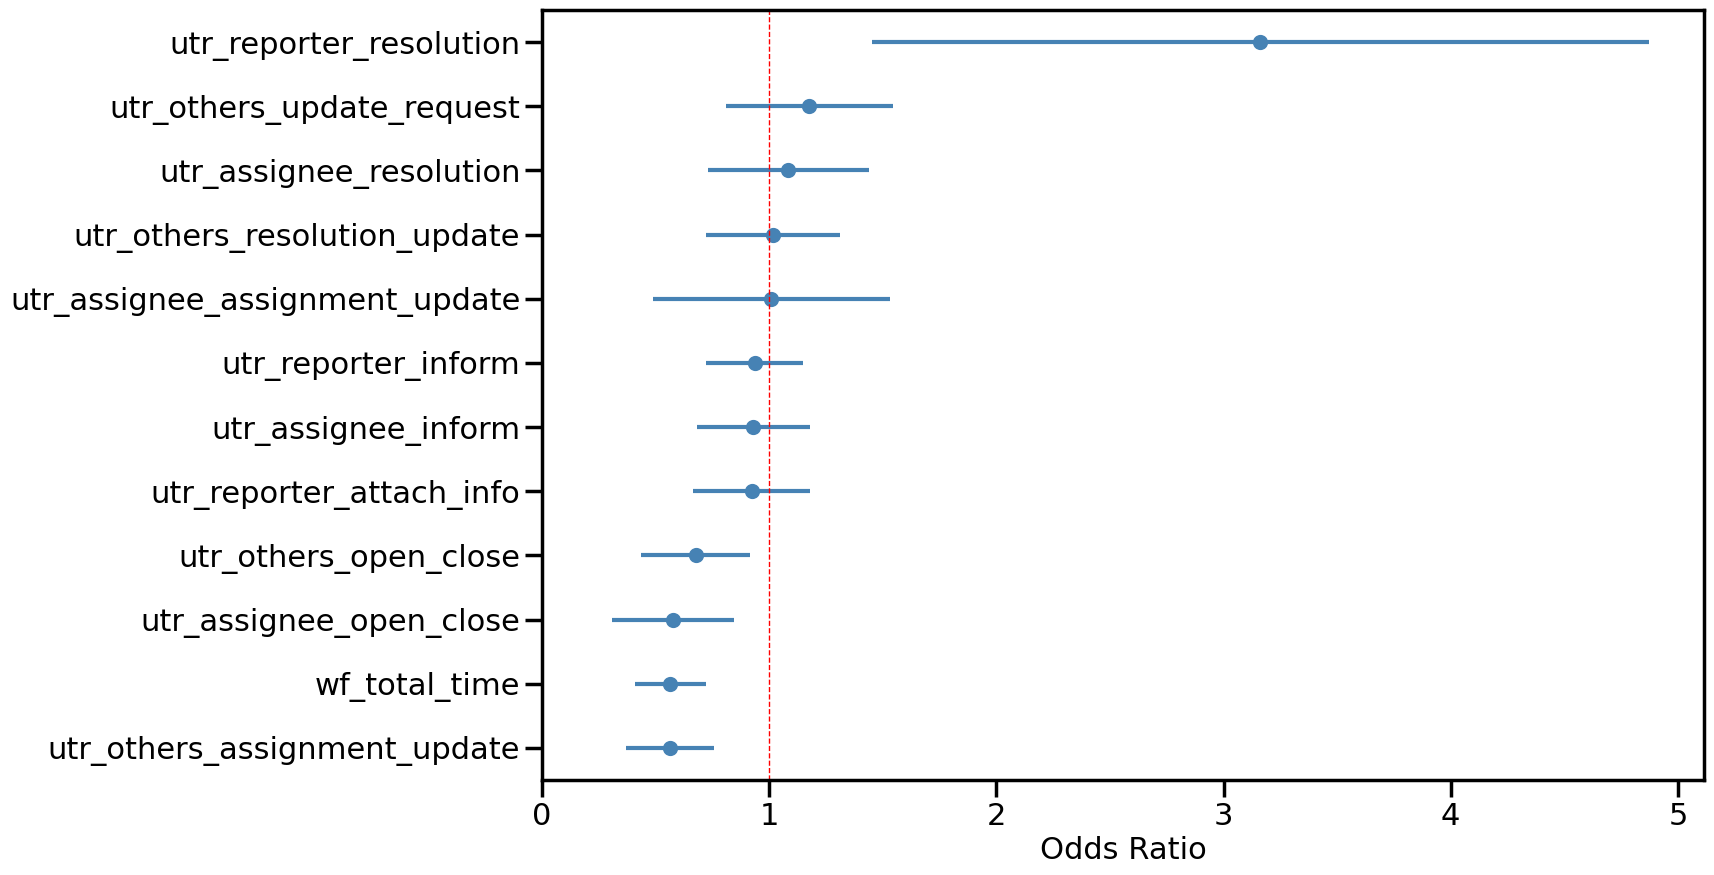

Three Levels - With DA features (counts)
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        28
           1       0.33      0.12      0.18        42
           2       0.71      0.96      0.82       111

    accuracy                           0.67       181
   macro avg       0.56      0.48      0.48       181
weighted avg       0.61      0.67      0.61       181

                             OrderedModel Results                             
Dep. Variable:                     Q1   Log-Likelihood:                -302.43
Model:                   OrderedModel   AIC:                             632.9
Method:            Maximum Likelihood   BIC:                             689.5
Date:                Wed, 22 May 2024                                         
Time:                        18:41:01                                         
No. Observations:                 422                                         
Df Residuals:            

/opt/conda/lib/python3.10/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]
/tmp/ipykernel_3958/1378586847.py:69: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(y=pd.np.arange(coef_df.shape[0]),


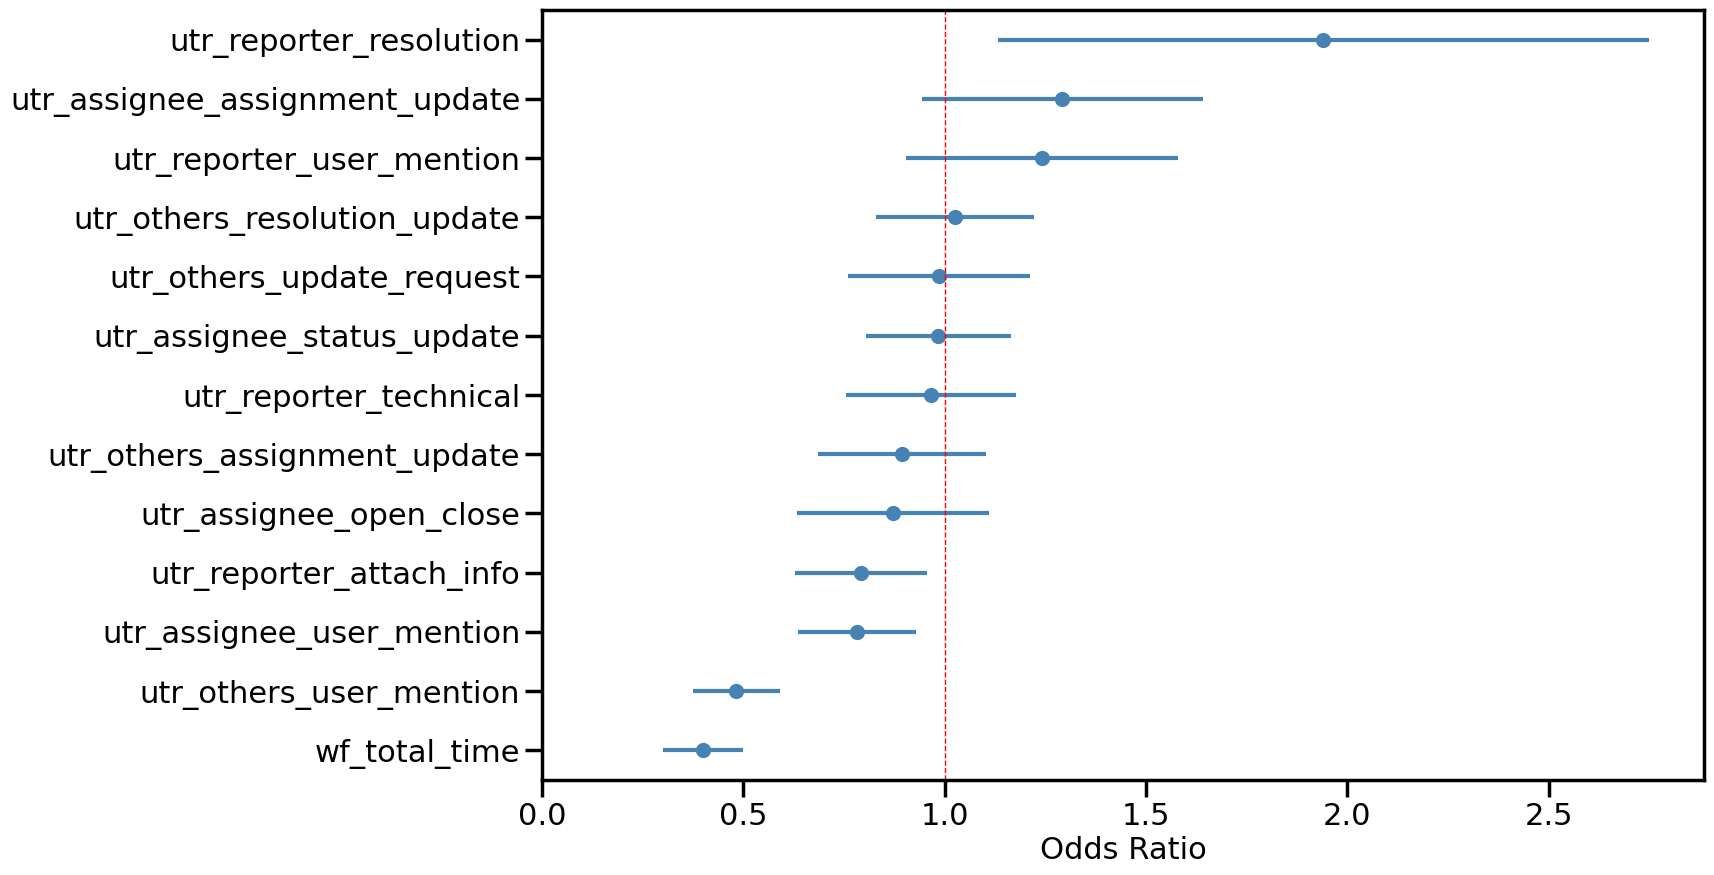

Three Levels - With DA features (%)
              precision    recall  f1-score   support

           0       0.52      0.39      0.45        28
           1       0.36      0.19      0.25        42
           2       0.74      0.92      0.82       111

    accuracy                           0.67       181
   macro avg       0.54      0.50      0.51       181
weighted avg       0.62      0.67      0.63       181

                             OrderedModel Results                             
Dep. Variable:                     Q1   Log-Likelihood:                -286.75
Model:                   OrderedModel   AIC:                             603.5
Method:            Maximum Likelihood   BIC:                             664.2
Date:                Wed, 22 May 2024                                         
Time:                        18:41:08                                         
No. Observations:                 422                                         
Df Residuals:                 

In [6]:

def pre_process(x,y):
    # min_max_f = [c for c in x.columns if c.startswith('wf_')]
    # min_max_f = features
    num_x = x.select_dtypes(include='number')
    x[num_x.columns] = StandardScaler().fit_transform(num_x[num_x.columns])
    # x.loc[:,min_max_f] = StandardScaler().fit_transform(x[min_max_f])
    return x,y

for option in options:
    print(f'{"$"*150}')
    print(f'{option[0]}')
    print(f'{"$"*150}')
    features = option[1]
    cycle_test('Ordinal Logistic Regression',
            fit_and_test,
            test_type=TestType.THREE_LEVELS,
            dataset_types=option[2],
            pre_processor=pre_process)
    print(summary[0])
    for i in range(1,len(summary[0].tables[1])-2):
        if float(summary[0].tables[1][i][4].data) <= 0.05:
            print(f'\'{summary[0].tables[1][i][0].data}\',',end='')
    print('')
    